                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

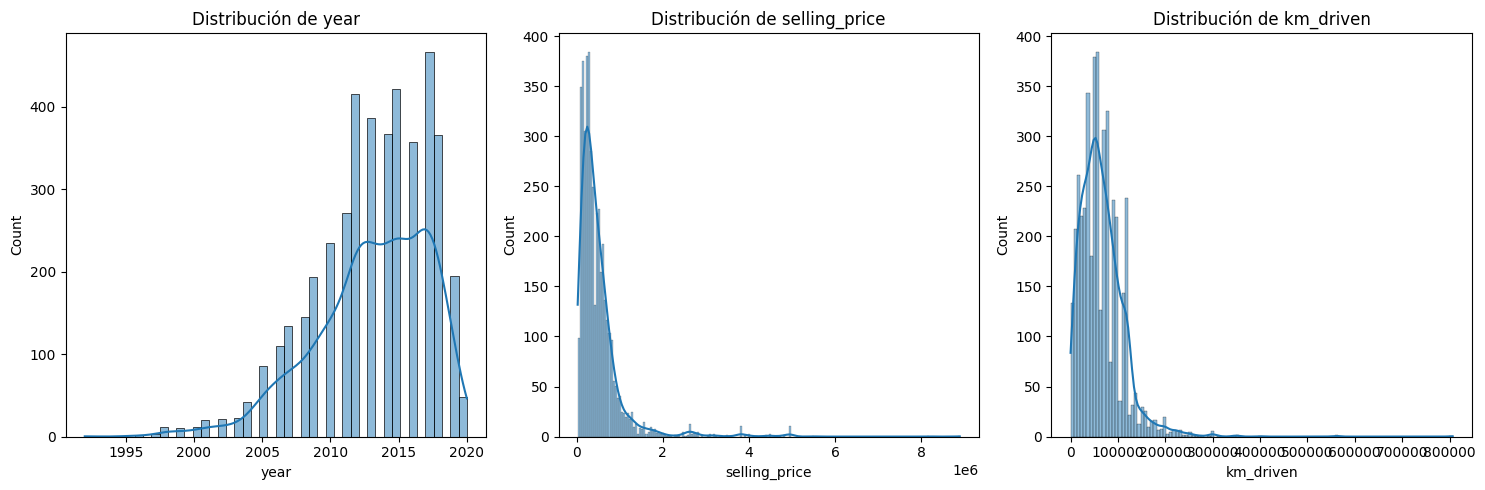

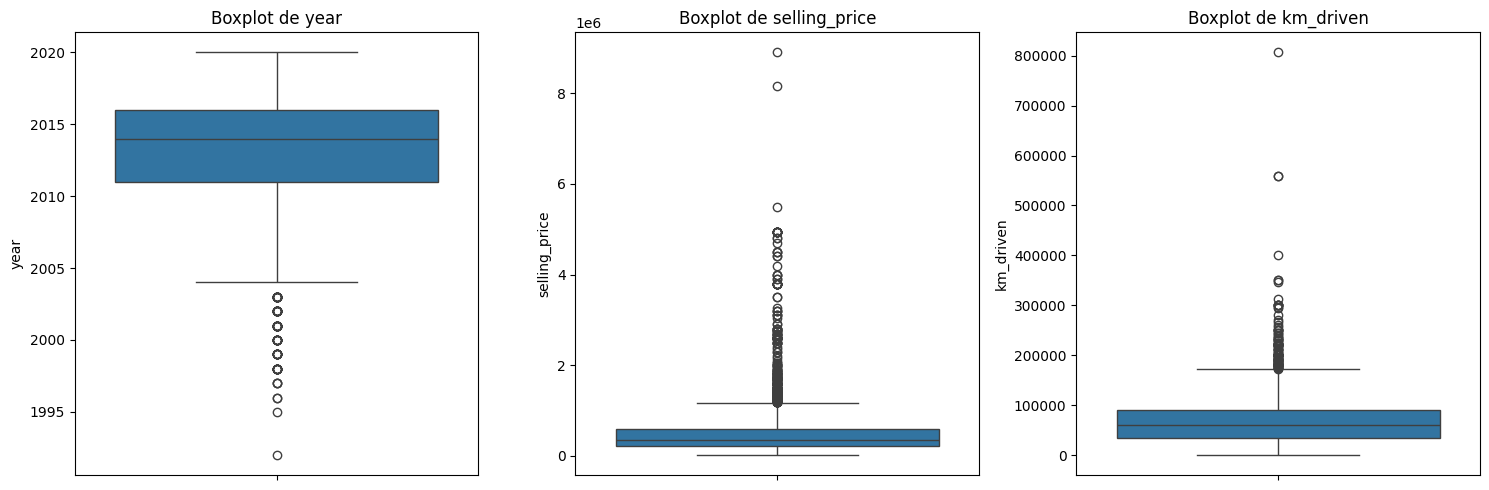

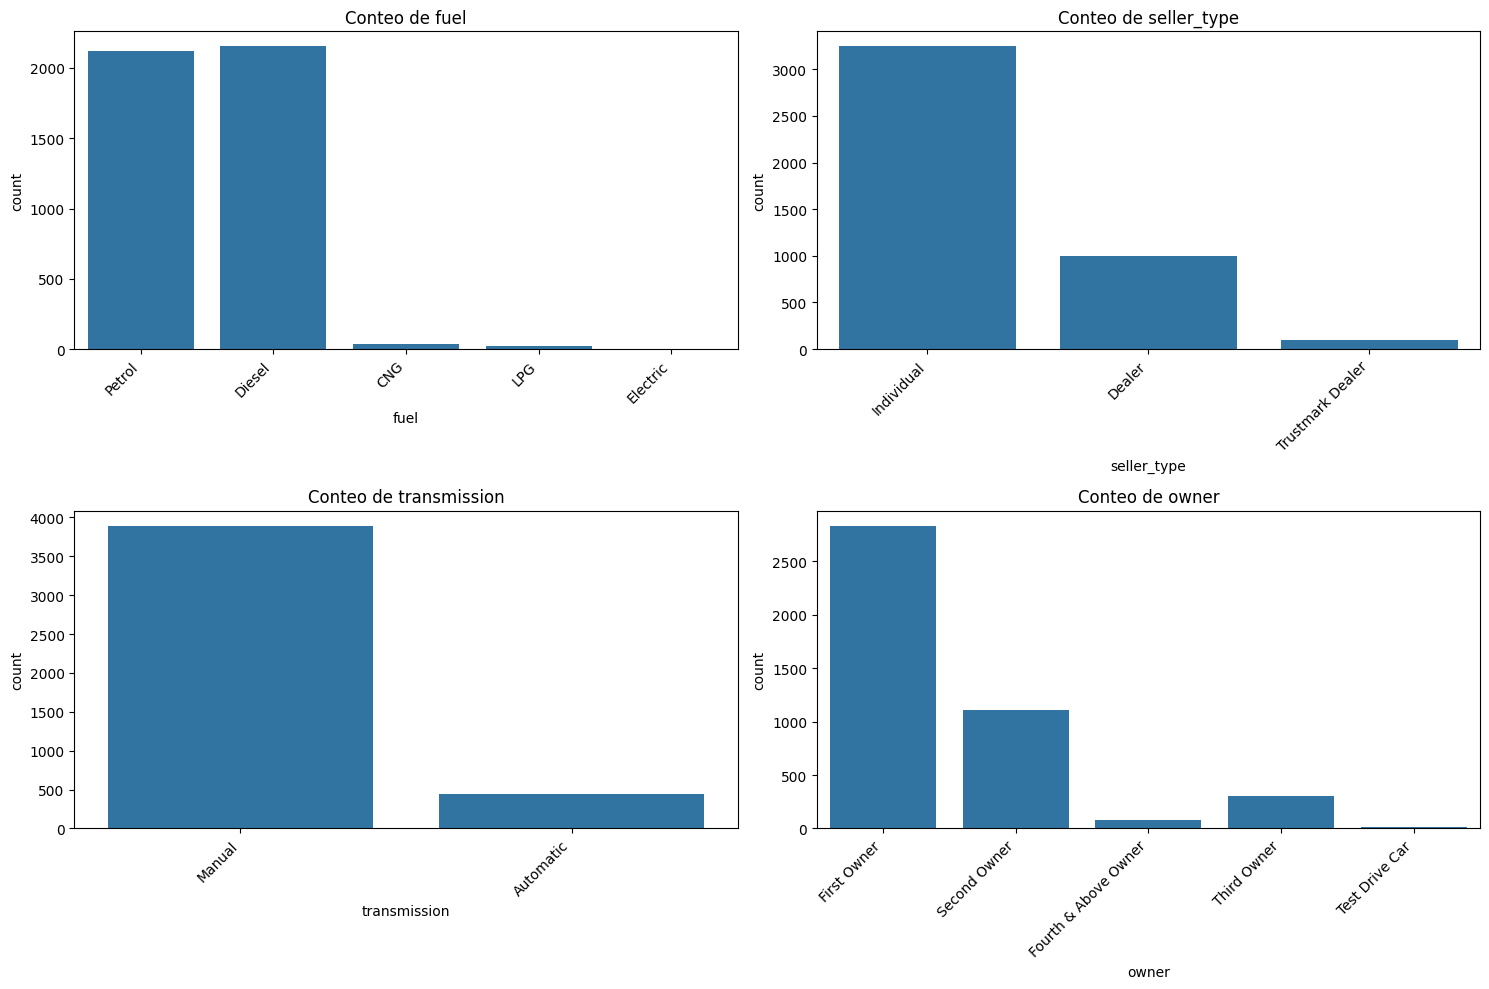

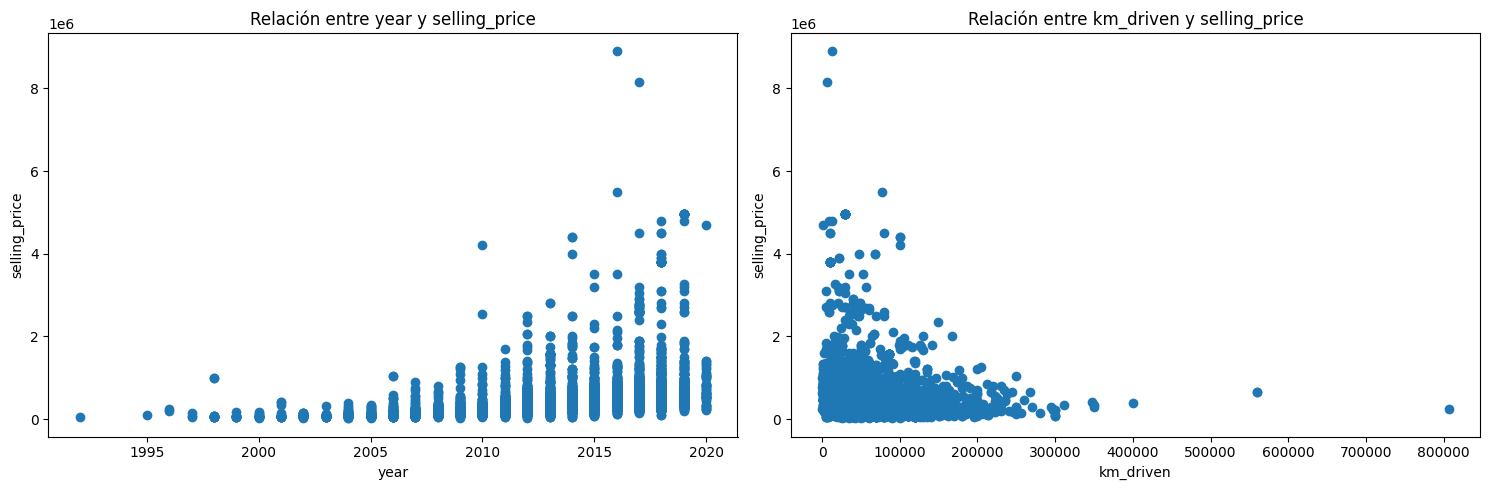

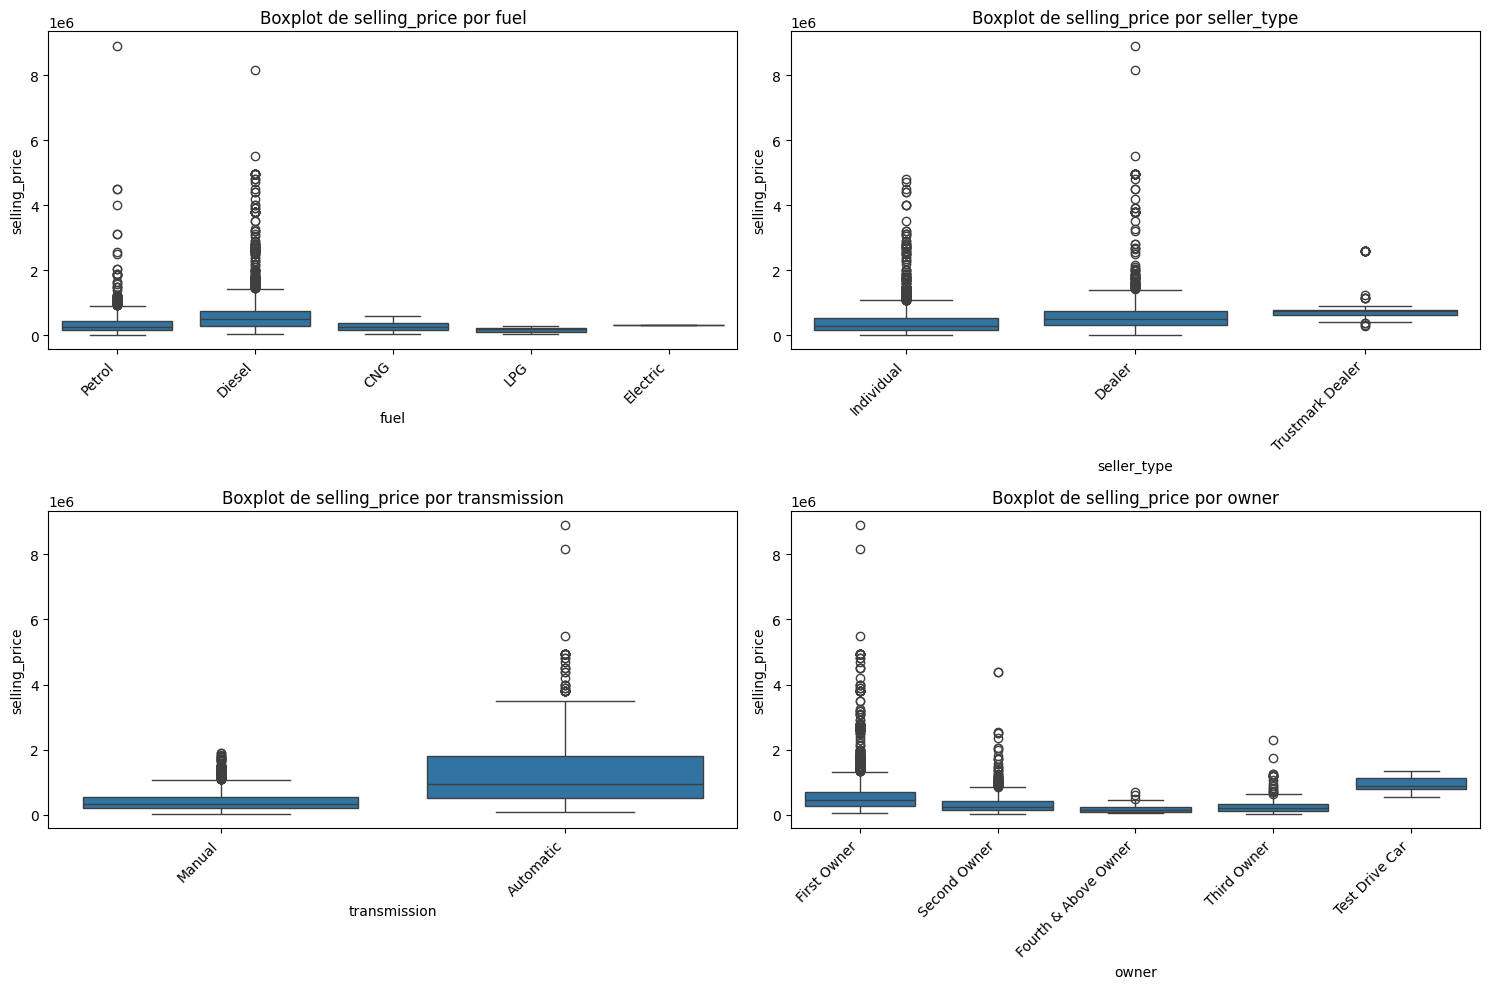

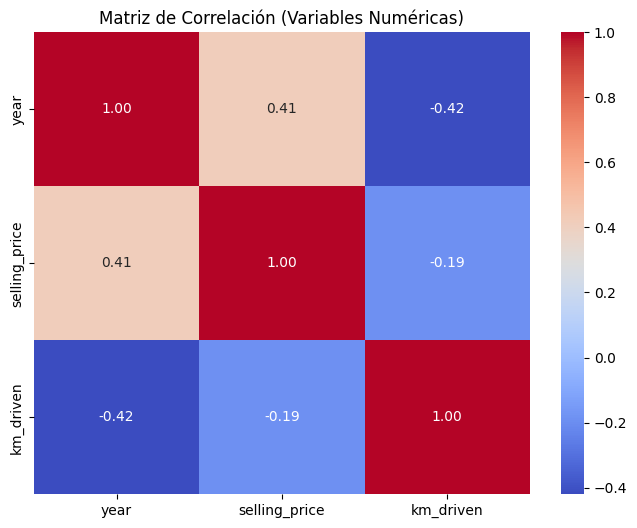

                       name  year  selling_price  km_driven  fuel_Diesel  \
0             Maruti 800 AC  2007          60000      70000        False   
1  Maruti Wagon R LXI Minor  2007         135000      50000        False   
2      Hyundai Verna 1.6 SX  2012         600000     100000         True   
3    Datsun RediGO T Option  2017         250000      46000        False   
4     Honda Amaze VX i-DTEC  2014         450000     141000         True   

   fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          False     False         True                    True   
1          False     False         True                    True   
2          False     False        False                    True   
3          False     False         True                    True   
4          False     False        False                    True   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                         False                 True   
1                         Fa

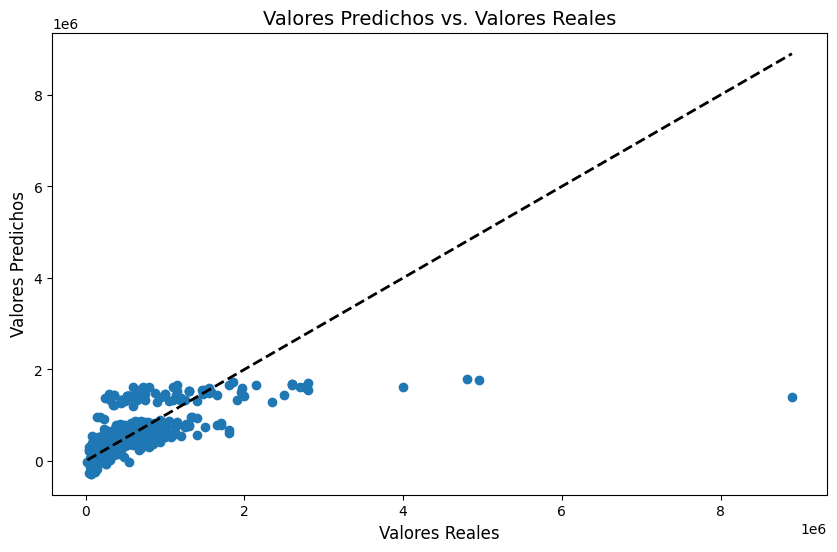

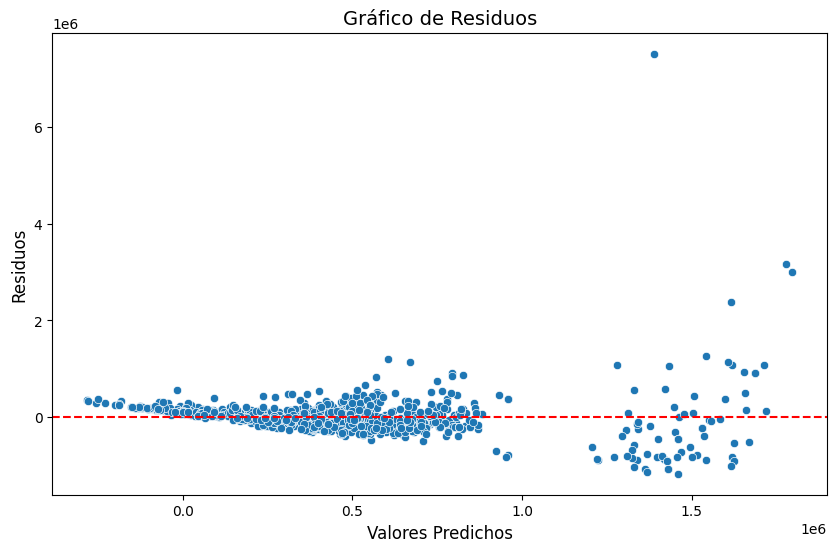

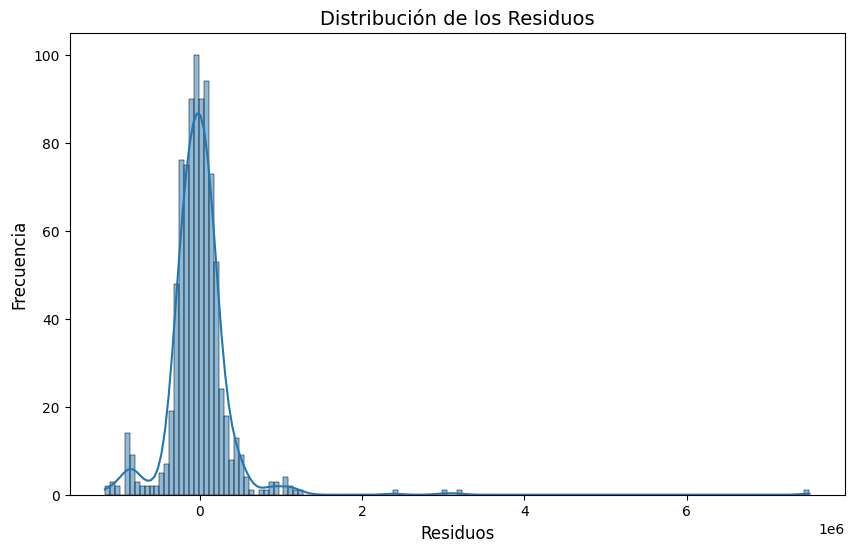

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("../data/linear_regression_data.csv")

# Mostrar las primeras filas del dataset
print(df.head())

# Obtener información general del dataset
print(df.info())

# Calcular estadísticas descriptivas
print(df.describe())

# Verificar valores faltantes
print(df.isnull().sum())

# Distribución de variables numéricas
numerical_features = ['year', 'selling_price', 'km_driven']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

# Diagramas de caja para identificar outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

# Distribución de variables categóricas
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Conteo de {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Relación entre variables numéricas y el precio de venta
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['year', 'km_driven']):
    plt.subplot(1, 2, i + 1)
    plt.scatter(df[feature], df['selling_price'])
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(f'Relación entre {feature} y selling_price')
plt.tight_layout()
plt.show()

# Relación entre variables categóricas y el precio de venta
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=feature, y='selling_price')
    plt.title(f'Boxplot de selling_price por {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Matriz de correlación
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

# Aplicar One-Hot Encoding a las variables categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Mostrar las primeras filas del DataFrame transformado
print(df.head())

# Mostrar la información del DataFrame transformado
print(df.info())

from sklearn.feature_selection import SelectKBest, f_regression

# 1. Eliminar la columna 'name'
df_selected = df.drop('name', axis=1)

# Separar la variable objetivo y las características
X = df_selected.drop('selling_price', axis=1)
y = df_selected['selling_price']

# 2. Aplicar SelectKBest para seleccionar las mejores k características
# Vamos a seleccionar las top 8 características (puedes ajustar este número)
num_features_to_select = 8
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_feature_indices = selector.get_support()
selected_features = X.columns[selected_feature_indices]

print("Características seleccionadas por SelectKBest:")
print(selected_features)

# Crear un nuevo DataFrame con solo las características seleccionadas y la variable objetivo
df_final = df_selected[selected_features].copy()
df_final['selling_price'] = y

print("\nPrimeras filas del DataFrame final con características seleccionadas:")
print(df_final.head())

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_final.drop('selling_price', axis=1)
y = df_final['selling_price']

# Dividir el dataset en conjuntos de entrenamiento y prueba
# Usaremos un 80% para entrenamiento y un 20% para prueba
# random_state asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (y_test):", y_test.shape)

from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Lineal entrenado.")

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually instead of using squared=False
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas de Evaluación del Modelo de Regresión Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R cuadrado): {r2:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot de Valores Predichos vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Valores Predichos vs. Valores Reales', fontsize=14)
plt.show()

# 2. Gráfico de Residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Gráfico de Residuos', fontsize=14)
plt.show()

# 3. Distribución de los Residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de los Residuos', fontsize=14)
plt.show()